$$
H = \frac{p^2}2 + \gamma \sin(\Theta t) s + D ( 1-e^{-\alpha q})^2
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4
import scipy.integrate as si

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [3]:
class MOsc:
    def __init__(self, γ, Θ, D=1, α=1, C=0):
        self.γ = γ
        self.D = D
        self.α = α
        self.C = C
        self.Θ = Θ
    def V(self, q, t):
        return self.D * np.square(1. - np.exp(-self.α * q)) - self.C
    def Vq(self, q, t):
        return 2 * self.D * self.α * np.exp(-self.α * q) * (1. - np.exp(-self.α * q))
    def f(self, t):
        return self.γ * np.sin(self.Θ * t)
    def lag(self, p, q, s, t):
        return 0.5 * p**2 - self.V(q, t) - self.f(t) * 0.5 * s**2
    def energy(self, p, q, s, t):
        return 0.5*p**2 + self.f(t) * 0.5 * s**2 + self.V(q, t)

In [9]:
def rk4s(system, init, tspan):
    def derivs(x,t):
        p,q,s = x
        dp = - system.Vq(q,t) - system.f(t) * p * s
        dq = p
        ds = system.lag(p, q, s, t)
        return (dp, dq, ds)
    return rk4(derivs, init, tspan)

def adaptive(system, init, tspan):
    t_span = (tspan[0], tspan[-1]) 
    def derivs(t, x):
        p,q,s = x
        dp = - system.Vq(q,t) - system.f(t) * p * s
        dq = p
        ds = system.lag(p, q, s, t)
        return (dp, dq, ds)
    return si.solve_ivp(derivs, t_span, init, t_eval=tspan, method="LSODA", dense_output=True, rtol=1e-6)

## RK4 comparisons

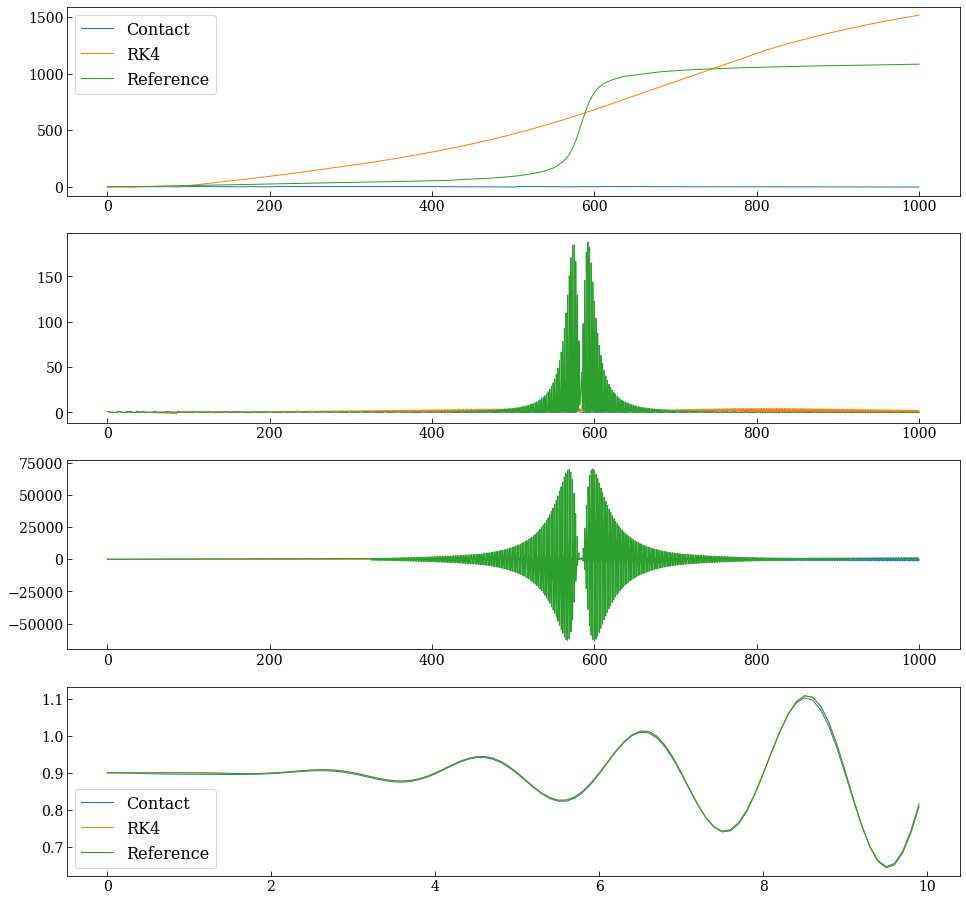

In [10]:
mosc = MOsc(0.01, np.pi)
dt = 0.1
tf = 1000
tspan = np.arange(0.0, tf, dt)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0,s0], tspan)
    r = adaptive(mosc, [p0,q0,s0], tspan)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[1], label="Reference", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[0], label="Reference", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], sols, tspan), label="Contact", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], solrk.T[2], tspan), label="RK4", linewidth=1)
    plt.plot(tspan, mosc.energy(r.y[0], r.y[1], r.y[2], tspan), label="Reference", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], sols[:cut], tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], solrk.T[2][:cut], tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(r.y[0][:cut], r.y[1][:cut], r.y[2][:cut], tspan[:cut]), label="Reference", linewidth=1)
    plt.legend()

    plt.show()


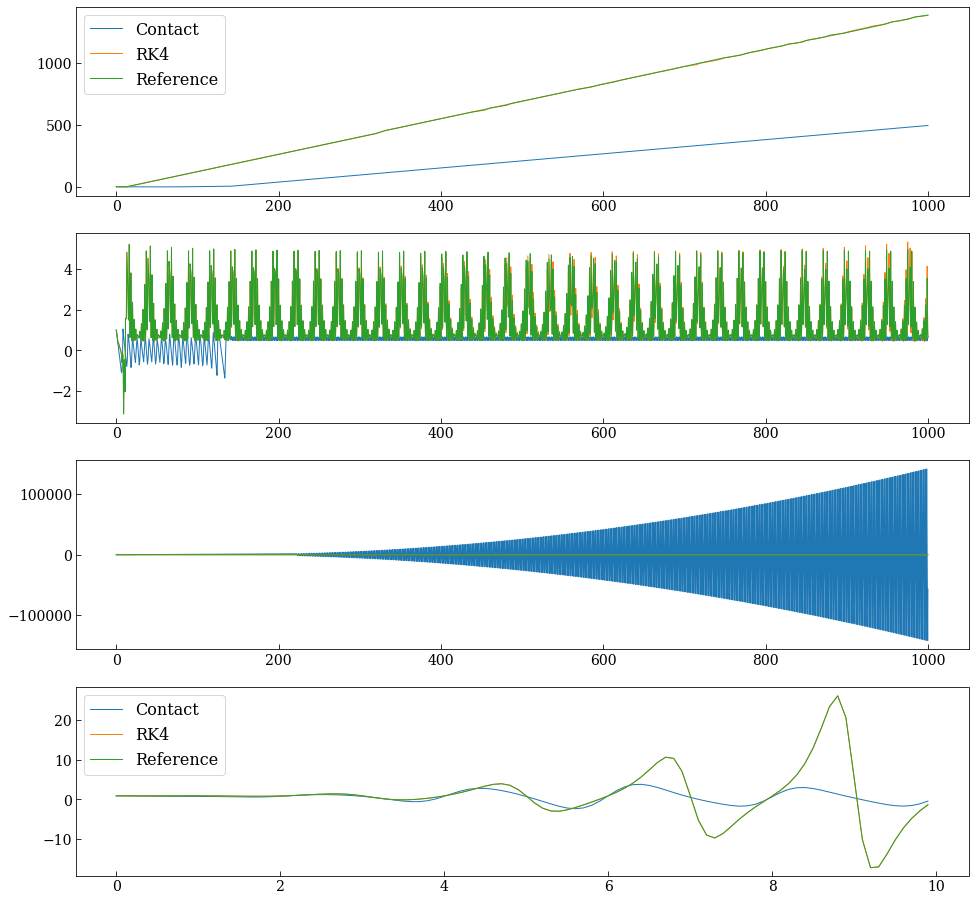

In [11]:
mosc = MOsc(0.5, np.pi)
dt = 0.1
tf = 1000

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0,s0], tspan)
    r = adaptive(mosc, [p0,q0,s0], tspan)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[1], label="Reference", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[0], label="Reference", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], sols, tspan), label="Contact", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], solrk.T[2], tspan), label="RK4", linewidth=1)
    plt.plot(tspan, mosc.energy(r.y[0], r.y[1], r.y[2], tspan), label="Reference", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], sols[:cut], tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], solrk.T[2][:cut], tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(r.y[0][:cut], r.y[1][:cut], r.y[2][:cut], tspan[:cut]), label="Reference", linewidth=1)
    plt.legend()

    plt.show()


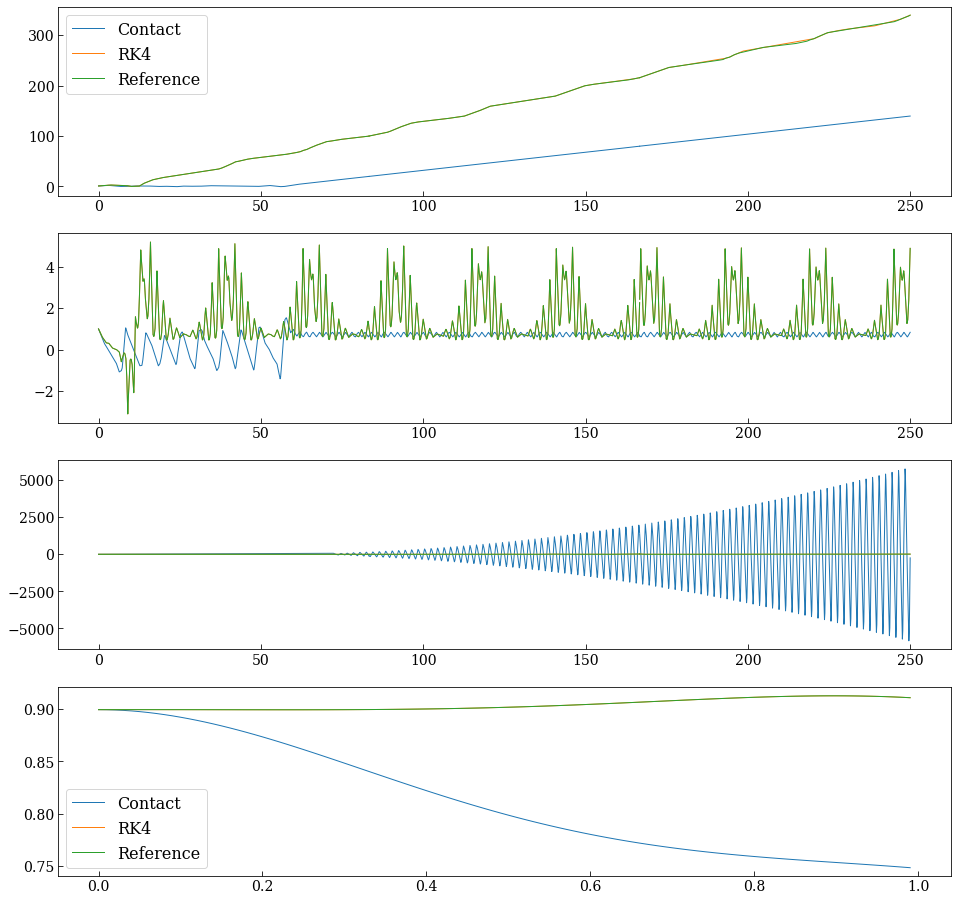

In [12]:
mosc = MOsc(0.5, np.pi)
dt = 0.01
tf = 250
tspan = np.arange(0.0, tf, dt)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0,s0], tspan)
    r = adaptive(mosc, [p0,q0,s0], tspan)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[1], label="Reference", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[0], label="Reference", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], sols, tspan), label="Contact", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], solrk.T[2], tspan), label="RK4", linewidth=1)
    plt.plot(tspan, mosc.energy(r.y[0], r.y[1], r.y[2], tspan), label="Reference", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], sols[:cut], tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], solrk.T[2][:cut], tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(r.y[0][:cut], r.y[1][:cut], r.y[2][:cut], tspan[:cut]), label="Reference", linewidth=1)
    plt.legend()

    plt.show()



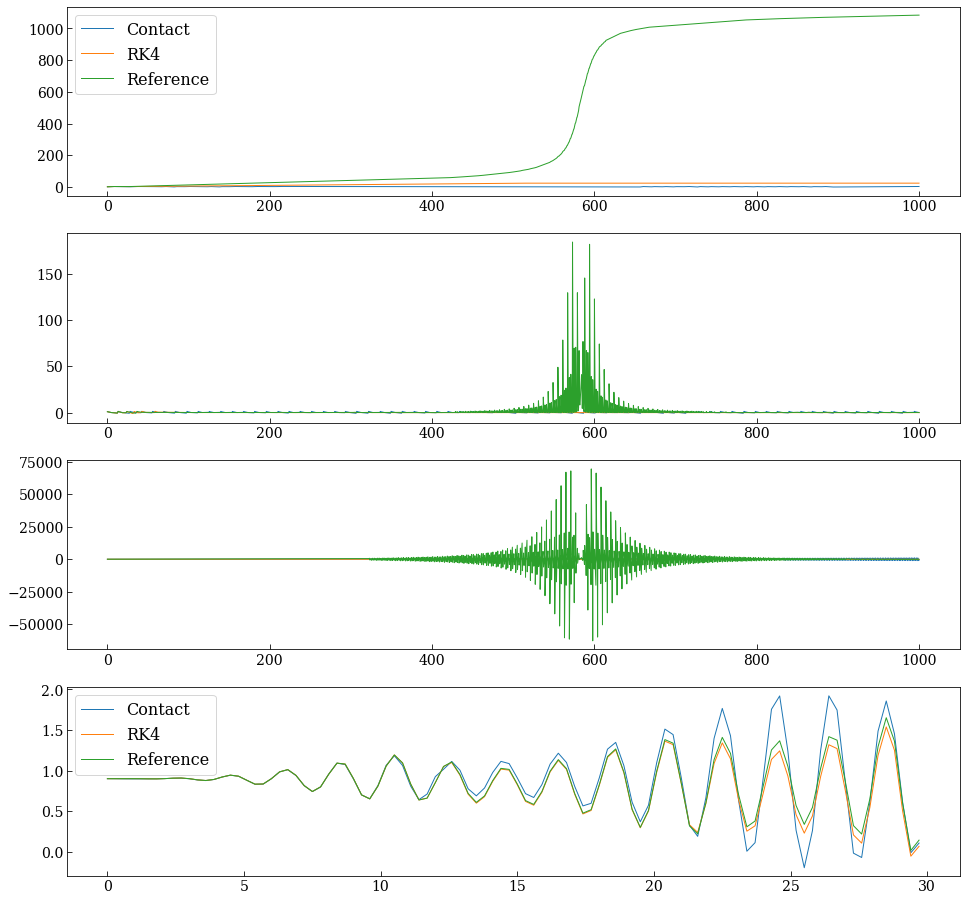

In [13]:
mosc = MOsc(0.01, np.pi)
dt = 0.3
tf = 1000
tspan = np.arange(0.0, tf, dt)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0,s0], tspan)
    r = adaptive(mosc, [p0,q0,s0], tspan)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[1], label="Reference", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan, r.y[0], label="Reference", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], sols, tspan), label="Contact", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], solrk.T[2], tspan), label="RK4", linewidth=1)
    plt.plot(tspan, mosc.energy(r.y[0], r.y[1], r.y[2], tspan), label="Reference", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], sols[:cut], tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], solrk.T[2][:cut], tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(r.y[0][:cut], r.y[1][:cut], r.y[2][:cut], tspan[:cut]), label="Reference", linewidth=1)
    plt.legend()

    plt.show()
